In [1]:
!nvidia-smi

Wed Apr 17 21:34:54 2024       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 551.78                 Driver Version: 551.78         CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                     TCC/WDDM  | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 3050 ...  WDDM  |   00000000:01:00.0 Off |                  N/A |
| N/A   36C    P5              9W /   35W |     336MiB /   4096MiB |     34%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [2]:
import os
HOME = os.getcwd()
print(HOME)


c:\Users\Dell\Desktop\all_files\Datathon\Problem Statement - 2


In [3]:
%cd {HOME}

c:\Users\Dell\Desktop\all_files\Datathon\Problem Statement - 2


c:\Users\Dell\Desktop\all_files\Datathon\.conda\lib\site-packages\IPython\core\magics\osm.py:417: UserWarning: using dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [4]:
# !wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1pz68D1Gsx80MoPg-_q-IbEdESEmyVLm-' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1pz68D1Gsx80MoPg-_q-IbEdESEmyVLm-" -O vehicle-counting.mp4 && rm -rf /tmp/cookies.txt
SOURCE_VIDEO_PATH = f"{HOME}/clip3.mp4"


In [5]:
# !pip install ultralytics

In [6]:

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.10  Python-3.10.14 torch-2.2.2+cu118 CUDA:0 (NVIDIA GeForce RTX 3050 Laptop GPU, 4096MiB)
Setup complete  (12 CPUs, 15.7 GB RAM, 434.8/454.9 GB disk)


In [8]:
# !pip uninstall torch torchvision


In [9]:
# !pip3 install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118


In [7]:
%cd {HOME}
# !git clone https://github.com/ifzhang/ByteTrack.git
%cd {HOME}/ByteTrack

# workaround related to https://github.com/roboflow/notebooks/issues/80
!sed -i 's/onnx==1.8.1/onnx==1.9.0/g' requirements.txt

!pip3 install -q -r requirements.txt
!python3 setup.py -q develop
!pip install -q cython_bbox
!pip install -q onemetric
# workaround related to https://github.com/roboflow/notebooks/issues/112 and https://github.com/roboflow/notebooks/issues/106
!pip install -q loguru lap thop

from IPython import display
display.clear_output()


import sys
sys.path.append(f"{HOME}/ByteTrack")


import yolox
print("yolox.__version__:", yolox.__version__)

yolox.__version__: 0.1.0


In [8]:
from yolox.tracker.byte_tracker import BYTETracker, STrack
from onemetric.cv.utils.iou import box_iou_batch
from dataclasses import dataclass


@dataclass(frozen=True)
class BYTETrackerArgs:
    track_thresh: float = 0.25
    track_buffer: int = 30
    match_thresh: float = 0.8
    aspect_ratio_thresh: float = 3.0
    min_box_area: float = 1.0
    mot20: bool = False

In [9]:
!pip install supervision==0.1.0


from IPython import display
display.clear_output()


import supervision
print("supervision.__version__:", supervision.__version__)

supervision.__version__: 0.1.0


In [10]:
from supervision.draw.color import ColorPalette
from supervision.geometry.dataclasses import Point
from supervision.video.dataclasses import VideoInfo
from supervision.video.source import get_video_frames_generator
from supervision.video.sink import VideoSink
from supervision.notebook.utils import show_frame_in_notebook
from supervision.tools.detections import Detections, BoxAnnotator
from supervision.tools.line_counter import LineCounter, LineCounterAnnotator

In [11]:
# settings
MODEL = "yolov8x.pt"

In [12]:
from ultralytics import YOLO

model = YOLO(MODEL)
model.fuse()

Fusing... 
YOLOv8x summary: 268 layers, 68200608 parameters, 0 gradients, 257.8 GFLOPs


In [16]:
# import torch
# device: str = "mps" if torch.backends.mps.is_available() else "cpu"
# print("Using device:", device)


In [17]:
# %cd {HOME}
# !yolo task=detect mode=predict model=yolov8x.pt conf=0.25 source={f"helloWorld.mp4"}

In [18]:
CLASS_NAMES_DICT = model.model.names

In [19]:
CLASS_NAMES_DICT

{0: 'person',
 1: 'bicycle',
 2: 'car',
 3: 'motorcycle',
 4: 'airplane',
 5: 'bus',
 6: 'train',
 7: 'truck',
 8: 'boat',
 9: 'traffic light',
 10: 'fire hydrant',
 11: 'stop sign',
 12: 'parking meter',
 13: 'bench',
 14: 'bird',
 15: 'cat',
 16: 'dog',
 17: 'horse',
 18: 'sheep',
 19: 'cow',
 20: 'elephant',
 21: 'bear',
 22: 'zebra',
 23: 'giraffe',
 24: 'backpack',
 25: 'umbrella',
 26: 'handbag',
 27: 'tie',
 28: 'suitcase',
 29: 'frisbee',
 30: 'skis',
 31: 'snowboard',
 32: 'sports ball',
 33: 'kite',
 34: 'baseball bat',
 35: 'baseball glove',
 36: 'skateboard',
 37: 'surfboard',
 38: 'tennis racket',
 39: 'bottle',
 40: 'wine glass',
 41: 'cup',
 42: 'fork',
 43: 'knife',
 44: 'spoon',
 45: 'bowl',
 46: 'banana',
 47: 'apple',
 48: 'sandwich',
 49: 'orange',
 50: 'broccoli',
 51: 'carrot',
 52: 'hot dog',
 53: 'pizza',
 54: 'donut',
 55: 'cake',
 56: 'chair',
 57: 'couch',
 58: 'potted plant',
 59: 'bed',
 60: 'dining table',
 61: 'toilet',
 62: 'tv',
 63: 'laptop',
 64: 'mou

In [13]:
from typing import List

import numpy as np


# converts Detections into format that can be consumed by match_detections_with_tracks function
def detections2boxes(detections: Detections) -> np.ndarray:
    return np.hstack((
        detections.xyxy,
        detections.confidence[:, np.newaxis]
    ))


# converts List[STrack] into format that can be consumed by match_detections_with_tracks function
def tracks2boxes(tracks: List[STrack]) -> np.ndarray:
    return np.array([
        track.tlbr
        for track
        in tracks
    ], dtype=float)


# matches our bounding boxes with predictions
def match_detections_with_tracks(
    detections: Detections,
    tracks: List[STrack]
) -> Detections:
    if not np.any(detections.xyxy) or len(tracks) == 0:
        return np.empty((0,))

    tracks_boxes = tracks2boxes(tracks=tracks)
    iou = box_iou_batch(tracks_boxes, detections.xyxy)
    track2detection = np.argmax(iou, axis=1)

    tracker_ids = [None] * len(detections)

    for tracker_index, detection_index in enumerate(track2detection):
        if iou[tracker_index, detection_index] != 0:
            tracker_ids[detection_index] = tracks[tracker_index].track_id

    return tracker_ids

In [15]:
%cd {HOME}

from supervision.video.dataclasses import VideoInfo
video_info = VideoInfo.from_video_path(SOURCE_VIDEO_PATH)
TARGET_VIDEO_PATH =  f"{HOME}/analyzed.mp4"


c:\Users\Dell\Desktop\all_files\Datathon\Problem Statement - 2


In [ ]:
# !pip3 install ipywidgets --user
# # 
!pip install scikit-learn --upgrade --user


In [16]:
LINE_START = Point(0,925)
LINE_END = Point(750,925)
LINE_START2 = Point(760,900)
LINE_END2 = Point(1125,900)
LINE_START3 = Point(1135,925)
LINE_END3 = Point(1550,925)
LINE_START4 = Point(1550,900)
LINE_END4 = Point(1900,900)

'c:\\Users\\Dell\\Desktop\\all_files\\Datathon\\Problem Statement - 2/clip3.mp4'

In [26]:
SOURCE_VIDEO_PATH = f"{HOME}/sampleClip.mp4"


In [21]:
from tqdm.notebook import tqdm
bytetracker = BYTETracker(BYTETrackerArgs())
generator = get_video_frames_generator(SOURCE_VIDEO_PATH)
iterator = iter(generator)
frame = next(iterator)
box_annotator = BoxAnnotator(color=ColorPalette(),thickness=2,text_thickness= 1,text_scale=0.5)
box_annotator2 = BoxAnnotator(color=ColorPalette(),thickness=6,text_thickness= 6,text_scale=1)

linecounter = LineCounter(start= LINE_START,end= LINE_END)
linecounter2 = LineCounter(start= LINE_START2,end= LINE_END2)

linecounter3 = LineCounter(start= LINE_START3,end= LINE_END3)
linecounter4 = LineCounter(start= LINE_START4,end= LINE_END4)
lineAnnotator = LineCounterAnnotator(thickness=2,text_thickness=1,text_scale=0.5)
# start, end = Point(x=0, y=1080), Point(x=3840, y=1080)
# line_zone = LineZone(start=start, end=end)
frameCount = 0
prev_count = 0
threshold = 4
with VideoSink(TARGET_VIDEO_PATH,video_info) as sink:
    for frame in tqdm(generator,total=video_info.total_frames):
        frameCount+=1
        results = model(frame)[0]
        indices = []
        for k,i in enumerate(results.boxes.cls.cpu().numpy().astype(int)):
            if (i>0 and i<11):
                indices.append(k)
            else:
                pass
        indices = np.array(indices)
        detections = Detections(
            xyxy = results.boxes.xyxy.cpu().numpy()[indices],
            confidence= results.boxes.conf.cpu().numpy()[indices],
            class_id = results.boxes.cls.cpu().numpy().astype(int)[indices]
        )

        tracks = bytetracker.update(
            output_results = detections2boxes(detections=detections),
            img_info = frame.shape,
            img_size = frame.shape
        )
        tracker_id = match_detections_with_tracks(detections=detections,tracks=tracks)
        detections.tracker_id = np.array(tracker_id)
        labels = [
            f"#{tracker_id} {CLASS_NAMES_DICT[class_id]} {condfidence:0.2f}"
            for _,condfidence,class_id,tracker_id
            in detections
        ]
        if (frameCount%120 == 0):
            count_increase = max(linecounter2.in_count,linecounter2.out_count)-prev_count
            if (count_increase >= threshold):
                category = [1]
                labels2 = ["Good"]
            else:
                category = [0]
                labels2 = ["Bad"]
            prev_count = max(linecounter2.in_count,linecounter2.out_count)
        
        # detections2= Detections(
        #     xyxy= np.array([[100,100,1750,1000]]),
        #     confidence= np.array([1.0]),
        #     class_id=np.array(category)
        # )
        frame = box_annotator.annotate(frame=frame,detections=detections,labels = labels)
        # frame = box_annotator2.annotate(frame=frame,detections=detections2,labels = labels2)

        # show_frame_in_notebook(frame,(16,16))
        # linecounter.update(detections=detections)
        # lineAnnotator.annotate(frame=frame,line_counter=linecounter)
        # # crossed_in, crossed_out = line_zone.trigger(detections)

        # linecounter2.update(detections=detections)
        # lineAnnotator.annotate(frame=frame,line_counter=linecounter2)

        # linecounter3.update(detections=detections)
        # lineAnnotator.annotate(frame=frame,line_counter=linecounter2)

        # linecounter4.update(detections=detections)
        # lineAnnotator.annotate(frame=frame,line_counter=linecounter2)
        sink.write_frame(frame)


  0%|          | 0/1118 [00:00<?, ?it/s]

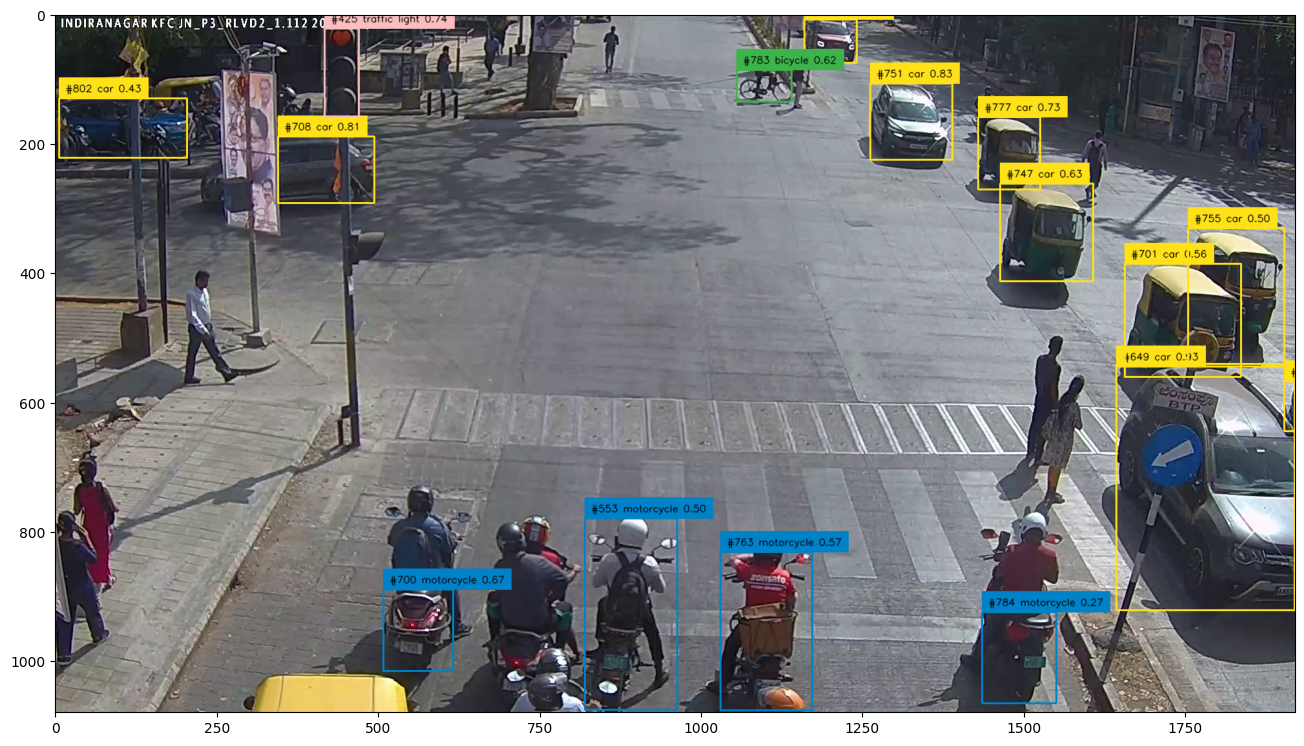

In [22]:
show_frame_in_notebook(frame,(16,16))

In [ ]:
gcb = np.array([1,2,3,4,5,6,7,8,9])

In [ ]:
gcb[abc]

array([2, 3, 4])